In [2]:
import pandas as pd 
import itertools
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('data/drugsComTrain_raw.tsv', sep='\t')

In [4]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [6]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') |(df['condition']=='High Blood Pressure')| (df['condition']=='Diabetes, Type 2')]

In [7]:
df.shape

(161297, 7)

In [8]:
df_train.shape

(42732, 7)

In [9]:
X = df_train.drop(['Unnamed: 0', 'drugName', 'rating', 'date', 'usefulCount'], axis=1)

****Data Analysis****

In [10]:
X.condition.value_counts()

condition
Birth Control          28788
Depression              9069
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: count, dtype: int64

In [11]:
X.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."
14,Birth Control,"""Started Nexplanon 2 months ago because I have..."


In [12]:
X_birth = X[(X['condition']=='Birth Control')]
X_dep = X[(X['condition']=='Depression')]
X_bp = X[(X['condition']=='Blood Pressure')]
X_diab = X[(X['condition']=='Diabetes, Type 2')]

In [13]:
X_birth.review

2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
9         "I had been on the pill for many years. When m...
14        "Started Nexplanon 2 months ago because I have...
22        "Nexplanon does its job. I can have worry free...
59        "Never again! After being on depo I was suppos...
61        "I was put on Yasmin for 6 months to regulate ...
63        "I have been on this for 8 months and sad to s...
64        "I was off birth control for a while consideri...
68                         "it caused me to gain 30 pounds"
74        "My experience during the nexplon is great not...
75        "I&#039;ve had mine for over a year and notice...
77        "I am always bleeding between periods, I&rsquo...
82        "I have been on pills for years, and in 2012 I...
83        "I had the Mirena put in almost a year ago. In...
90        "This medicine is absolutely terrible. After t...
97        "I am torn by the Nuvaring. Th

Text(0.5, 1.0, 'Word Cloud for Birth Control')

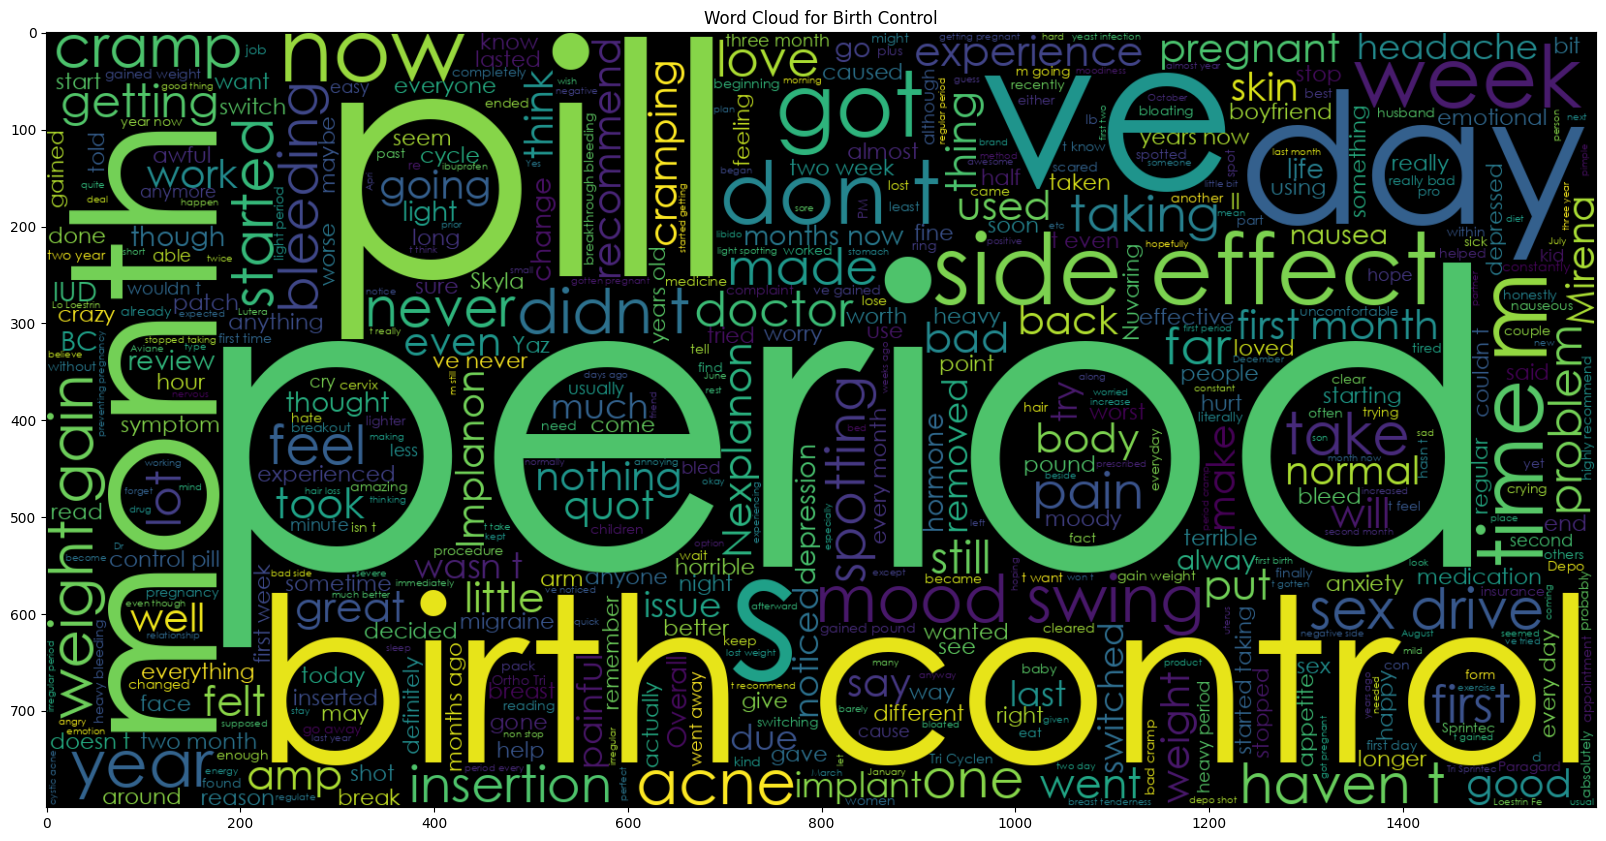

In [15]:
from wordcloud import WordCloud
plt.figure(figsize =(20,20))
font_path = 'data/font.ttf'
wc = WordCloud(max_words = 500, width = 1600, height = 800, font_path=font_path).generate(" ".join(X_birth.review))
plt.imshow(wc, interpolation='bilinear')
plt.title("Word Cloud for Birth Control", fontsize=12)